In [1]:
model_name = "loris3/stratified_equitoken_10m_curriculum_random"


dataset_train_name ="loris3/stratified_equitoken_10m_curriculum"
dataset_train_split_name = "validation"

dataset_test_name = "loris3/stratified_equitoken_10m_curriculum"
dataset_test_split_name = "validation"

In [2]:
import torch
import os


import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

from util import get_checkpoints_hub
from dotenv import load_dotenv
load_dotenv()

dataset_test = load_dataset(dataset_test_name)[dataset_test_split_name] 



len_ds = len(dataset_test)


In [3]:


def load_debug(start, stop):
    return torch.arange(start*393216, stop*393216, 1, dtype=torch.float64).reshape(-1,393216) /  (len_ds*393216)

gradient_dir = "./gradients/test/test/test/test"
if not os.path.exists(gradient_dir):
    os.makedirs(gradient_dir)
    chunks_test = [ (i, min(i+10000, len_ds), os.path.join(gradient_dir, str(i) + "_" + str(i + 10000))) for i in range(0, len(dataset_test),10000)]
    for start, stop, chunk in chunks_test:
        torch.save(load_debug(start, stop), chunk)


def validate():
    s = None
    if not os.path.exists("test"):
        data = load_debug(0, len_ds).squeeze()
        
        with torch.no_grad():
            s = torch.matmul(data, data.T).sum(dim=1)
        s = s / len_ds
        s = s.unsqueeze(0)
        torch.save(s, "test")
    else:
        s = torch.load("test")

    slurm = torch.load("/data/loriss21dm/babylm/mean_influence/test/test_test_test_test/test")
    assert torch.allclose(slurm, s.float())
 



    tensor = (s / slurm).float()


    array = tensor.numpy()

    plt.figure(figsize=(15, 5))
    plt.imshow(array, cmap='viridis', aspect='auto', interpolation=None)
    plt.colorbar()

    plt.show()




In [4]:
%run process_gradients.py test test 0 --mode=mean --dataset_test_split=test --dataset_train_split=test --test=True --test_dataset_size=53457 --gradients_per_file=10000 --batch_size=2

2025-01-31 08:45:34,178 - INFO - Time to einsum: 431.4276 seconds; 71.9046 s/chunk
2025-01-31 08:46:16,962 - INFO - Time to load task: 38.5040 seconds


Time to load task: 38.5058 seconds


2025-01-31 08:52:37,406 - INFO - Time to einsum: 380.4408 seconds; 63.4068 s/chunk
2025-01-31 08:53:07,790 - INFO - Time to load task: 27.4036 seconds


Time to load task: 27.4048 seconds


2025-01-31 08:56:44,697 - INFO - Time to einsum: 216.9045 seconds; 36.1508 s/chunk
2025-01-31 08:56:49,340 - INFO - Saved influence for checkpoint
2025-01-31 08:56:49,446 - INFO - Got influence for checkpoint-test/test/test/test


chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/0_10000 0 10000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/10000_20000 10000 20000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/20000_30000 20000 30000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/30000_40000 30000 40000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/40000_50000 40000 50000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/50000_60000 50000 60000


/tmp/ipykernel_2551318/387548085.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s = torch.load("test")
/tmp/ipykernel_2551318/387548085.py:25: FutureWarning: You are u

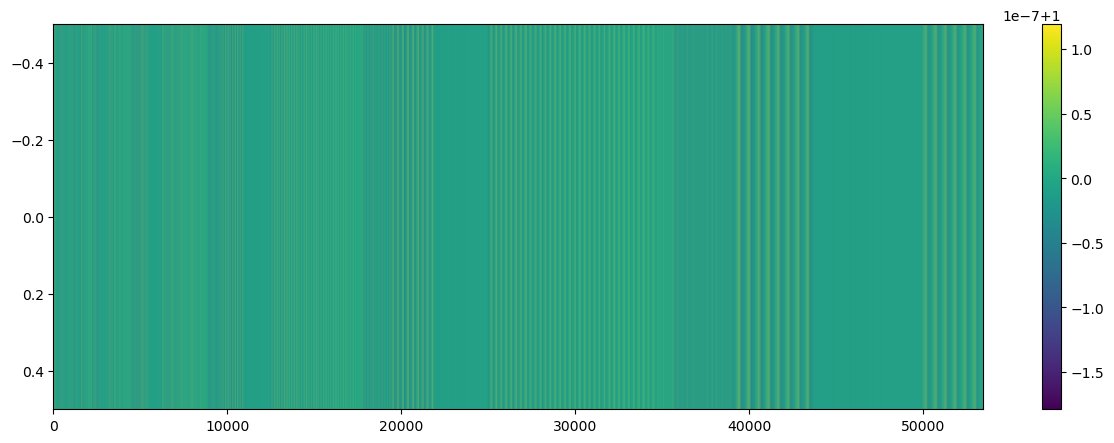

In [5]:
validate()

In [6]:
%run process_gradients.py test test 0 --mode=mean --dataset_test_split=test --dataset_train_split=test --test=True --test_dataset_size=53457 --gradients_per_file=10000 --batch_size=1

2025-01-31 08:56:50,481 - INFO - Calculating influence for checkpoint-test/test/test/test


jobs 6


2025-01-31 08:57:06,634 - INFO - Time to load task: 16.1446 seconds


Time to load task: 16.1484 seconds


2025-01-31 09:00:04,472 - INFO - Time to einsum: 177.8337 seconds; 29.6390 s/chunk
2025-01-31 09:00:22,982 - INFO - Time to load task: 15.7573 seconds


Time to load task: 15.7588 seconds


2025-01-31 09:03:15,691 - INFO - Time to einsum: 172.7063 seconds; 28.7844 s/chunk
2025-01-31 09:03:34,678 - INFO - Time to load task: 16.4033 seconds


Time to load task: 16.4063 seconds


2025-01-31 09:06:22,827 - INFO - Time to einsum: 168.1419 seconds; 28.0237 s/chunk
2025-01-31 09:06:40,304 - INFO - Time to load task: 14.9345 seconds


Time to load task: 14.9356 seconds


2025-01-31 09:09:31,356 - INFO - Time to einsum: 171.0494 seconds; 28.5082 s/chunk
2025-01-31 09:09:49,877 - INFO - Time to load task: 16.0885 seconds


Time to load task: 16.0904 seconds


2025-01-31 09:12:44,729 - INFO - Time to einsum: 174.8477 seconds; 29.1413 s/chunk
2025-01-31 09:12:52,344 - INFO - Time to load task: 5.2955 seconds


Time to load task: 5.2969 seconds


2025-01-31 09:14:58,632 - INFO - Time to einsum: 126.2856 seconds; 21.0476 s/chunk
2025-01-31 09:15:00,667 - INFO - Saved influence for checkpoint
2025-01-31 09:15:00,764 - INFO - Got influence for checkpoint-test/test/test/test


chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/0_10000 0 10000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/10000_20000 10000 20000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/20000_30000 20000 30000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/30000_40000 30000 40000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/40000_50000 40000 50000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/50000_60000 50000 60000


/tmp/ipykernel_2551318/387548085.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s = torch.load("test")
/tmp/ipykernel_2551318/387548085.py:25: FutureWarning: You are u

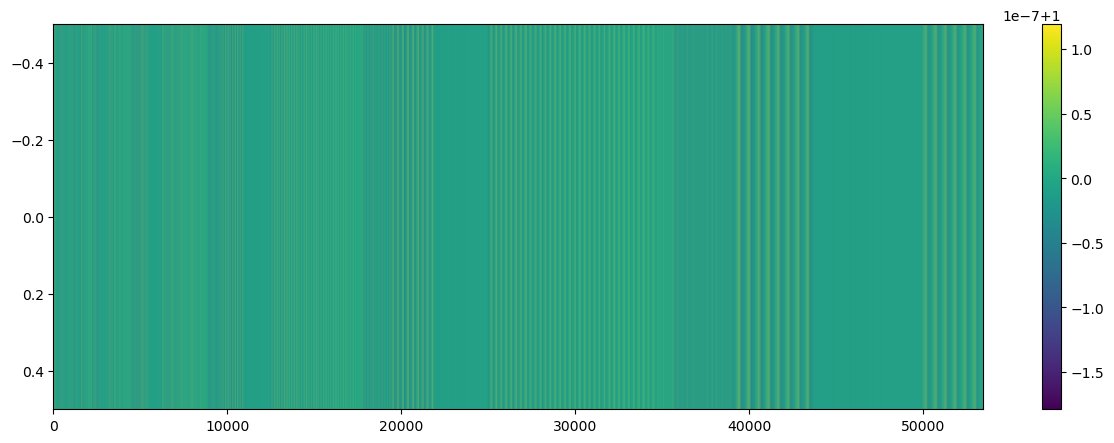

In [7]:
validate()

In [8]:
%run process_gradients.py test test 0 --mode=mean --dataset_test_split=test --dataset_train_split=test --test=True --test_dataset_size=53457 --gradients_per_file=10000 --batch_size=20

2025-01-31 09:15:01,931 - INFO - Calculating influence for checkpoint-test/test/test/test


jobs 1


2025-01-31 09:16:26,841 - INFO - Time to load task: 84.9003 seconds


Time to load task: 84.9043 seconds


2025-01-31 09:26:14,379 - INFO - Time to einsum: 587.5313 seconds; 97.9219 s/chunk
2025-01-31 09:26:32,054 - INFO - Saved influence for checkpoint
2025-01-31 09:26:32,156 - INFO - Got influence for checkpoint-test/test/test/test


chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/0_10000 0 10000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/10000_20000 10000 20000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/20000_30000 20000 30000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/30000_40000 30000 40000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/40000_50000 40000 50000
chunk_path_a, start_id_a, stop_id_a ./gradients/test/test/test/test/50000_60000 50000 60000


/tmp/ipykernel_2551318/387548085.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s = torch.load("test")
/tmp/ipykernel_2551318/387548085.py:25: FutureWarning: You are u

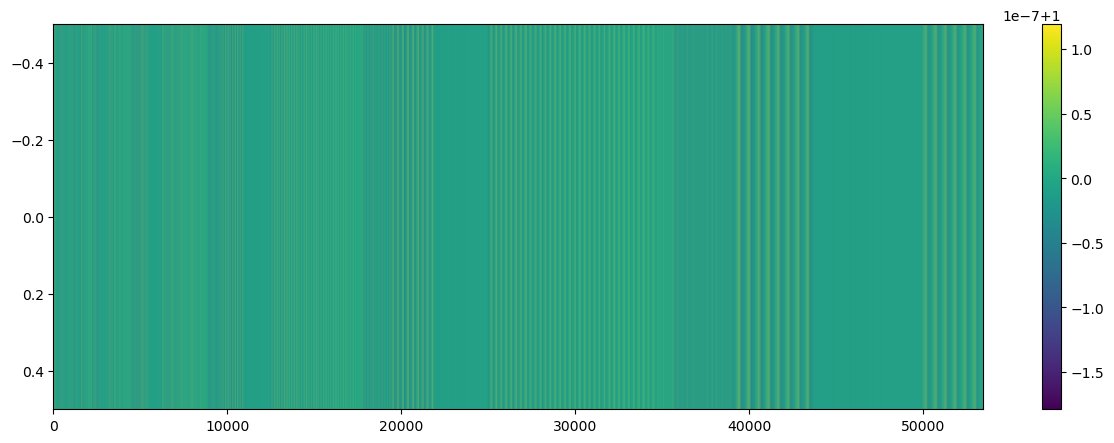

In [9]:
validate()